In [1]:
suppressPackageStartupMessages({
  library(ggplot2)
  library(patchwork)
  library(GenomicRanges)
  library(rtracklayer)
  library(Seurat)
  library(Signac)
  library(dplyr)
  library(Pando)
  library(BSgenome.Hsapiens.UCSC.hg38)
})

In [36]:
# read in the dataseurat_object <- readRDS('{PATH_1}')seurat_object <- seurat_object@data# change assay to atacDefaultAssay(seurat_object) <- "ATAC"# Subset the Seurat object for specific identsseurat_object <- subset(seurat_object, idents = c("DMSO_NT", "DASA_NT", "DASA_HIC2"))seurat_object

An object of class Seurat 
344955 features across 4651 samples within 4 assays 
Active assay: ATAC (279098 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: SCT, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [37]:
levels(seurat_object) <- c("DMSO_NT", "DASA_NT", "DASA_HIC2")

In [38]:
# table of cell counts
table(Idents(seurat_object))


  DMSO_NT   DASA_NT DASA_HIC2 
     1661      2615       375 

In [39]:
# Add cell type information to the Seurat object meta data using idents
seurat_object$cell_type <- Idents(seurat_object)


In [40]:
# Extract accessibility data from the Seurat object
accessibility_data <- seurat_object[["ATAC"]]

In [41]:
accessibility_data

ChromatinAssay data with 279098 features for 4651 cells
Variable features: 0 
Genome: hg38 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 16 

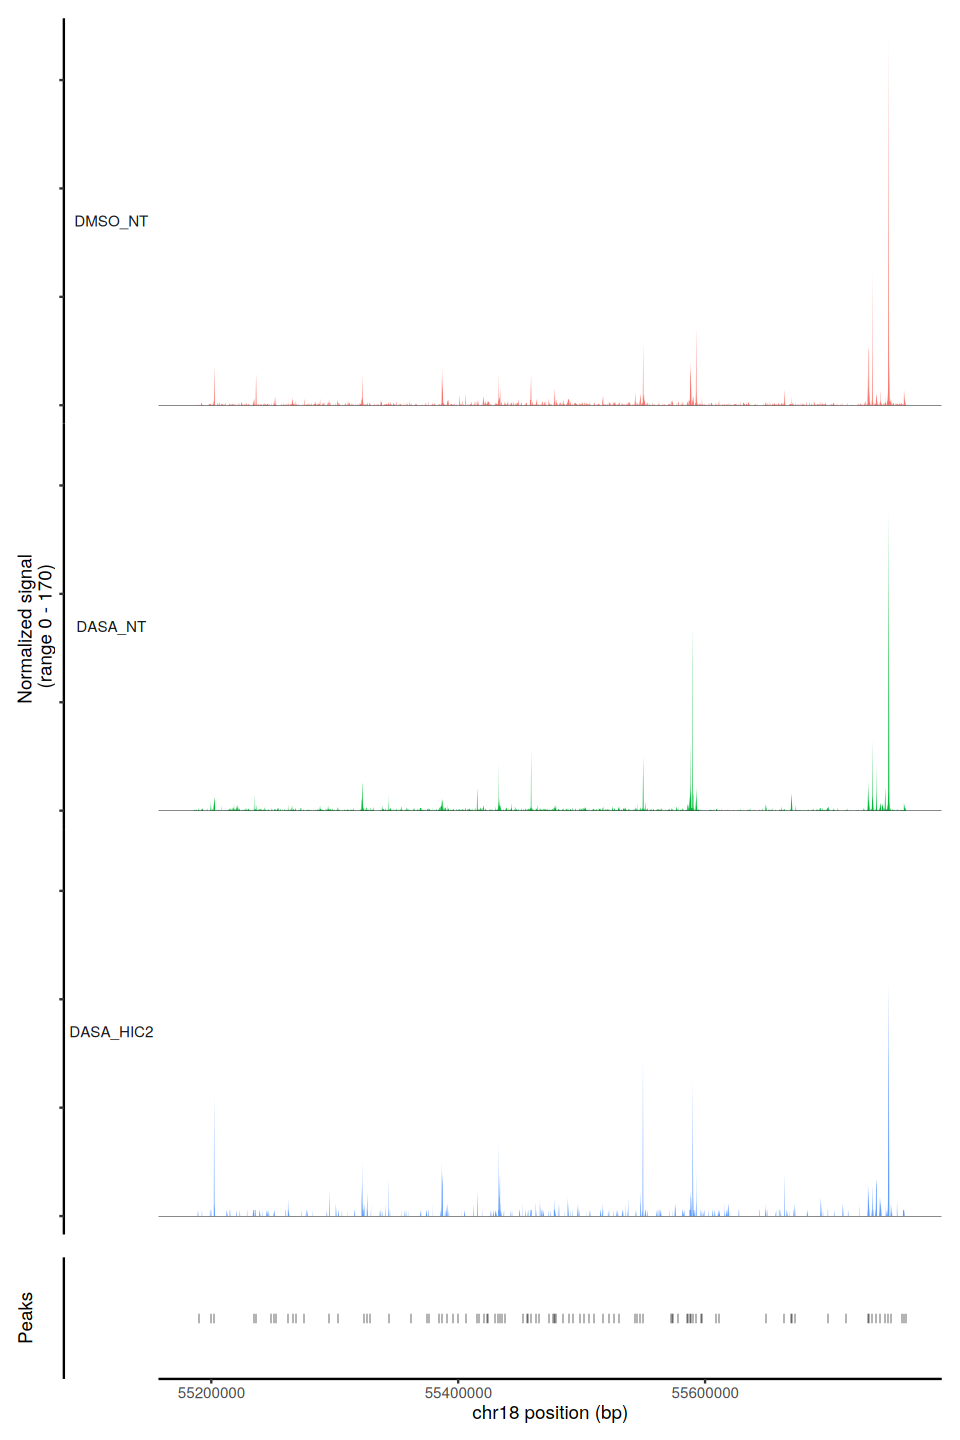

In [42]:
cov_plot <- CoveragePlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  annotation = FALSE,
  peaks = TRUE
  #extend.upstream = 50000,
  #extend.downstream = 50000,
)
cov_plot

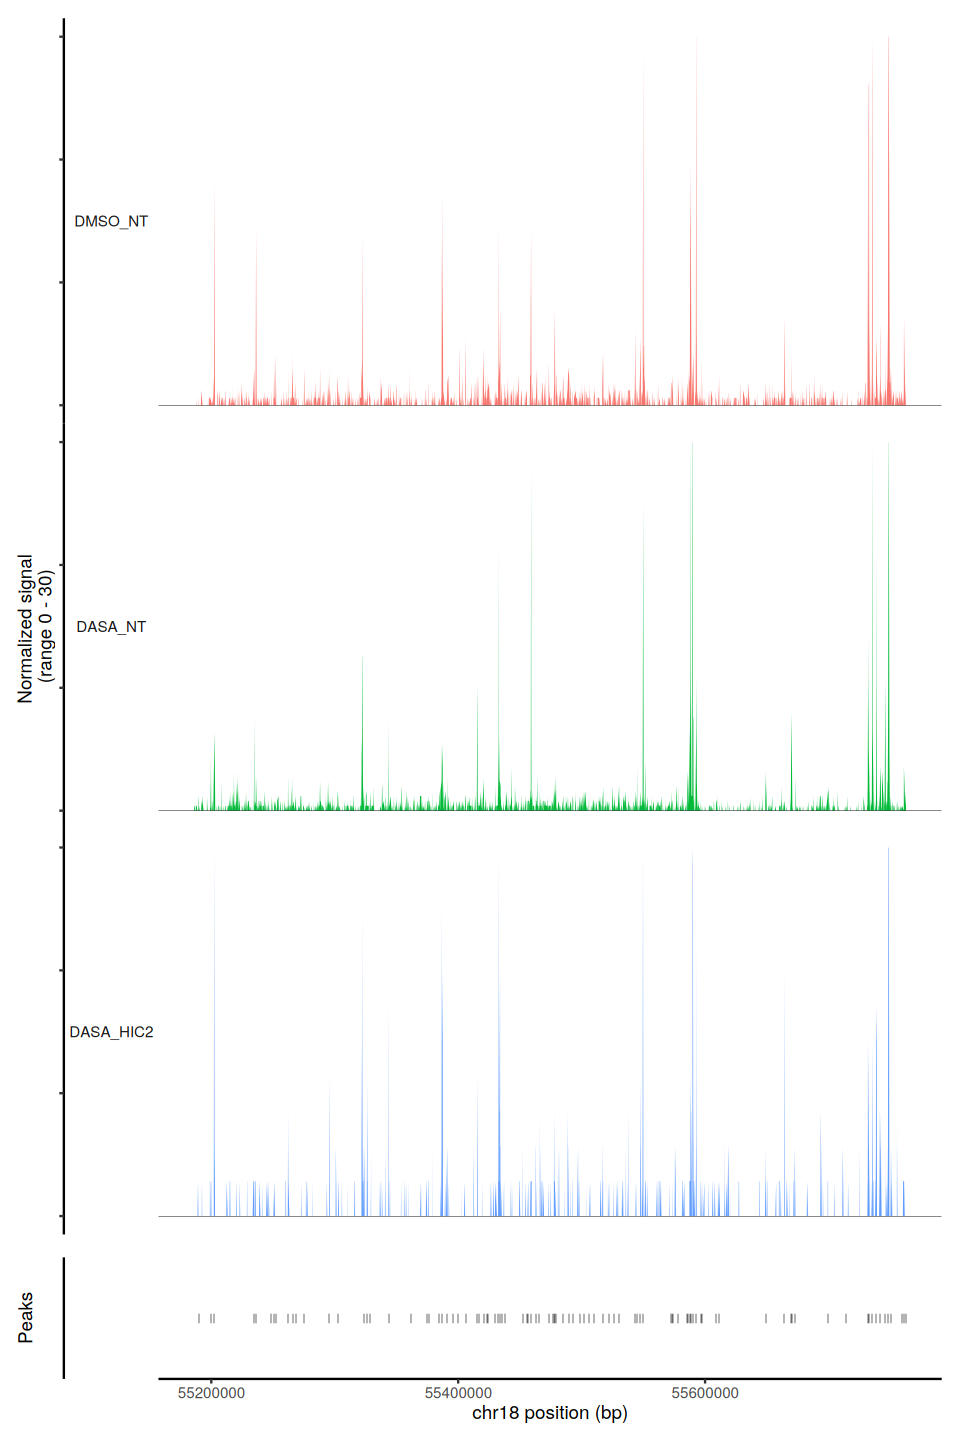

In [43]:
cov_plot <- CoveragePlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  annotation = FALSE,
  peaks = TRUE,
  # extend.upstream = 5000,
  # extend.downstream = 5000,
  ymax = 30
)
cov_plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


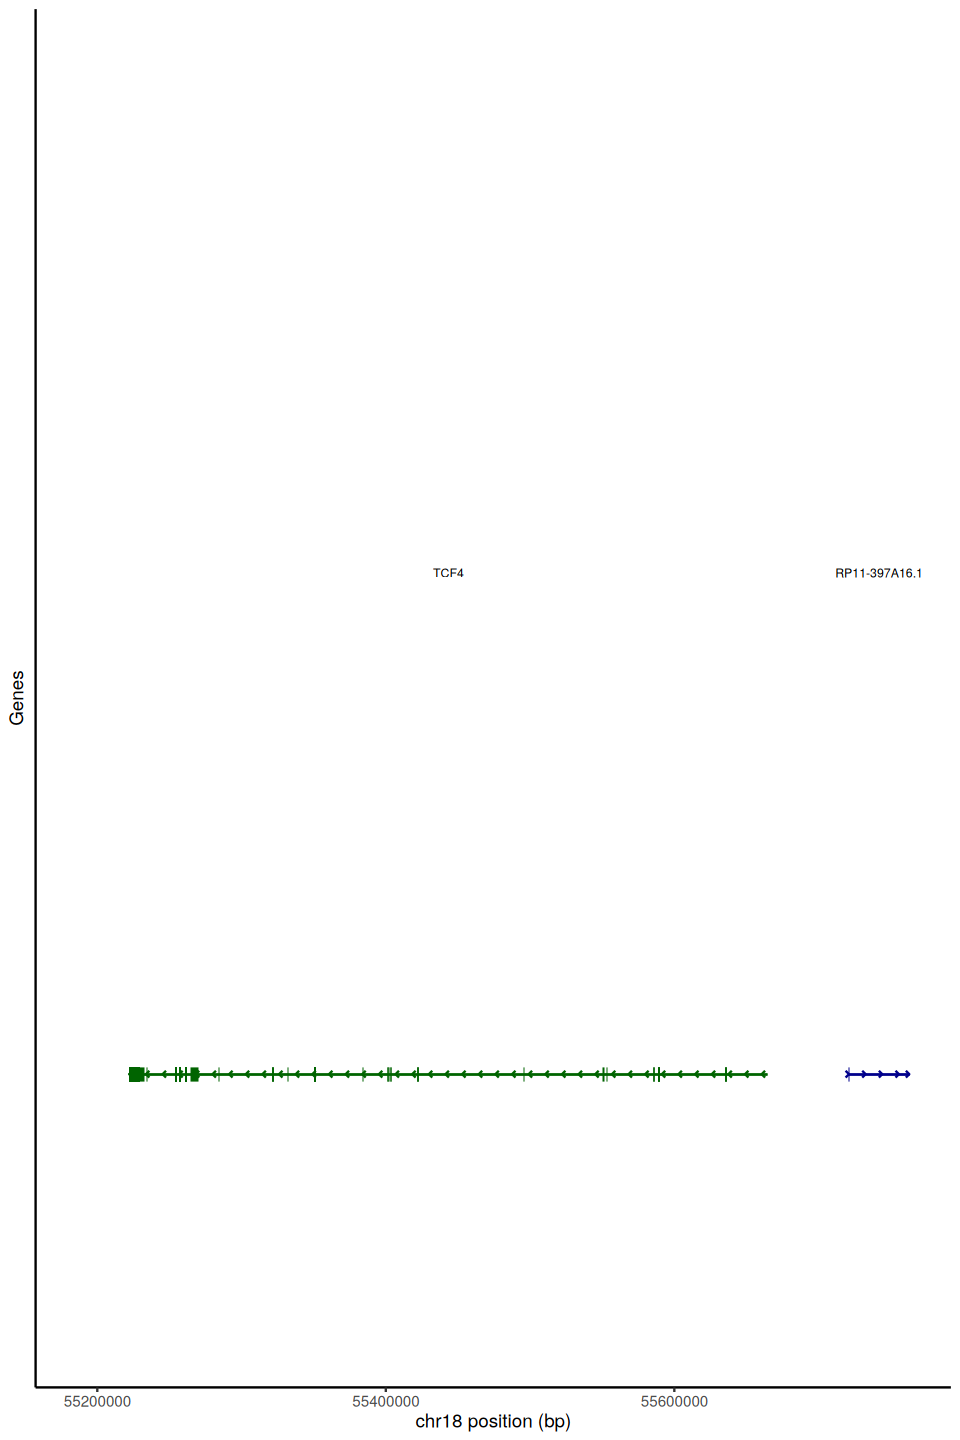

In [44]:
gene_plot <- AnnotationPlot(
  object = seurat_object,
  region = "chr18-55186072-55762857"
)
gene_plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


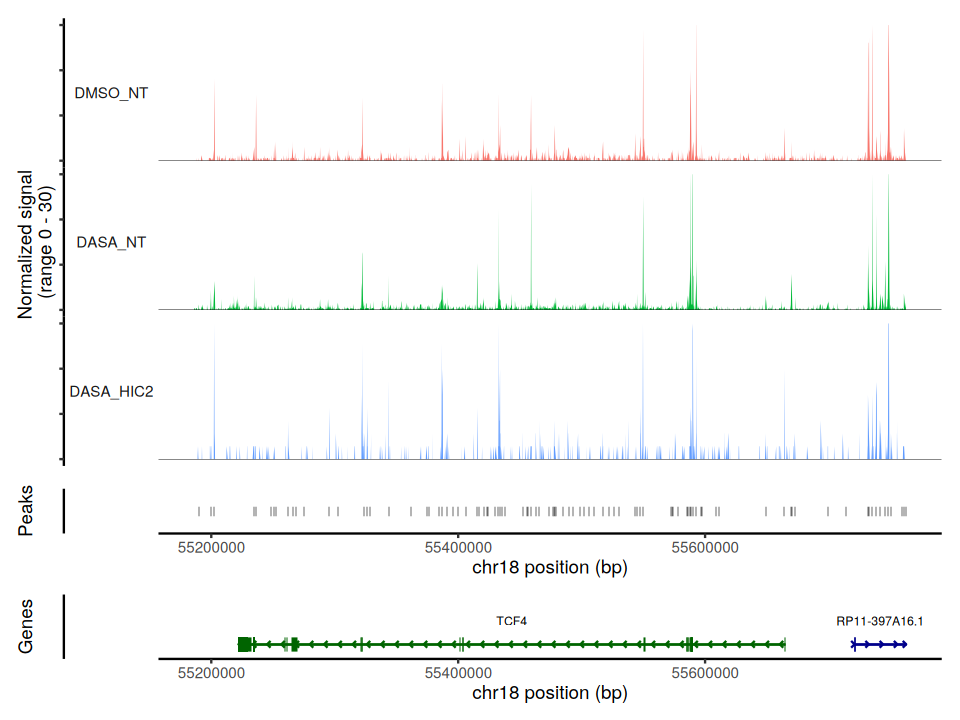

In [45]:
options(repr.plot.width=8, repr.plot.height=6)
combined_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot),
)
combined_plot

In [46]:
# regulatory_regions <- data.frame(
#   start = c(21400000, 21420000, 21440000, 21460000),
#   end = c(21410000, 21430000, 21450000, 21470000),
#   type = c("Activating", "Repressing", "Activating", "Repressing"),
#   name = c("Enhancer1", "Silencer1", "Enhancer2", "Silencer2"),
#   gene = c("HIC2", "HIC2", "UBE2L3", "UBE2L3")
# )

In [47]:
coefs <- read.csv('{PATH_2}', row.names = 1)

In [48]:
head(coefs)

,tf,target,region,term,estimate,std_err,statistic,pval,padj,corr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HMGA2,IL3RA,chrX-1239459-1240394,HMGA2:chrX_1239459_1240394,-0.003034754,0.03107030,-0.09767378,9.221938e-01,9.967800e-01,0.1524199
2,HMGA2,IL3RA,chrX-1249271-1250179,HMGA2:chrX_1249271_1250179,0.260591060,0.01340771,19.43590676,2.976427e-82,1.036489e-79,0.1524199
3,RLF,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:RLF,-0.005745815,0.05598099,-0.10263868,9.182526e-01,9.964553e-01,0.1576562
4,HIVEP3,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:HIVEP3,0.089890298,0.07973663,1.12734010,2.596361e-01,8.288942e-01,0.2333268
5,MECOM,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:MECOM,0.021645399,0.12719142,0.17017971,8.648736e-01,9.934819e-01,0.1320205
6,MXD4,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:MXD4,0.479336594,0.23404363,2.04806511,4.058960e-02,4.632811e-01,-0.1231881


In [64]:
# toggle pval or padj, 72 vs 9 regulators
# subset_coefs <- coefs[(coefs$target == "TCF4") & (coefs$pval < 0.05), ] 
subset_coefs <- coefs[(coefs$target == "TCF4") & (coefs$padj < 0.05), ] 
print(dim(subset_coefs))
head(subset_coefs)


[1]  9 10


,tf,target,region,term,estimate,std_err,statistic,pval,padj,corr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
316816,ETV1,TCF4,chr18-55202012-55202922,ETV1:chr18_55202012_55202922,-0.23475791,0.06952265,-3.376711,7.379004e-04,0.038482471,-0.2402541
317135,ZFPM2,TCF4,chr18-55386395-55387235,ZFPM2:chr18_55386395_55387235,0.07802790,0.02047927,3.810092,1.402021e-04,0.010199134,0.5391558
317260,HHEX,TCF4,chr18-55432050-55432927,HHEX:chr18_55432050_55432927,-0.23728841,0.05959003,-3.982015,6.908170e-05,0.005646272,-0.2590827
317778,ZNF148,TCF4,chr18-55589847-55590355,ZNF148:chr18_55589847_55590355,0.08695655,0.01977187,4.397993,1.110056e-05,0.001151575,0.2094331
317808,MYB,TCF4,chr18-55592305-55593221,MYB:chr18_55592305_55593221,-0.11131252,0.03247671,-3.427457,6.130563e-04,0.033360911,-0.4145111
318039,IKZF3,TCF4,chr18-55734861-55735820,IKZF3:chr18_55734861_55735820,-0.16223952,0.04705495,-3.447874,5.686144e-04,0.031544608,-0.1868749


Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


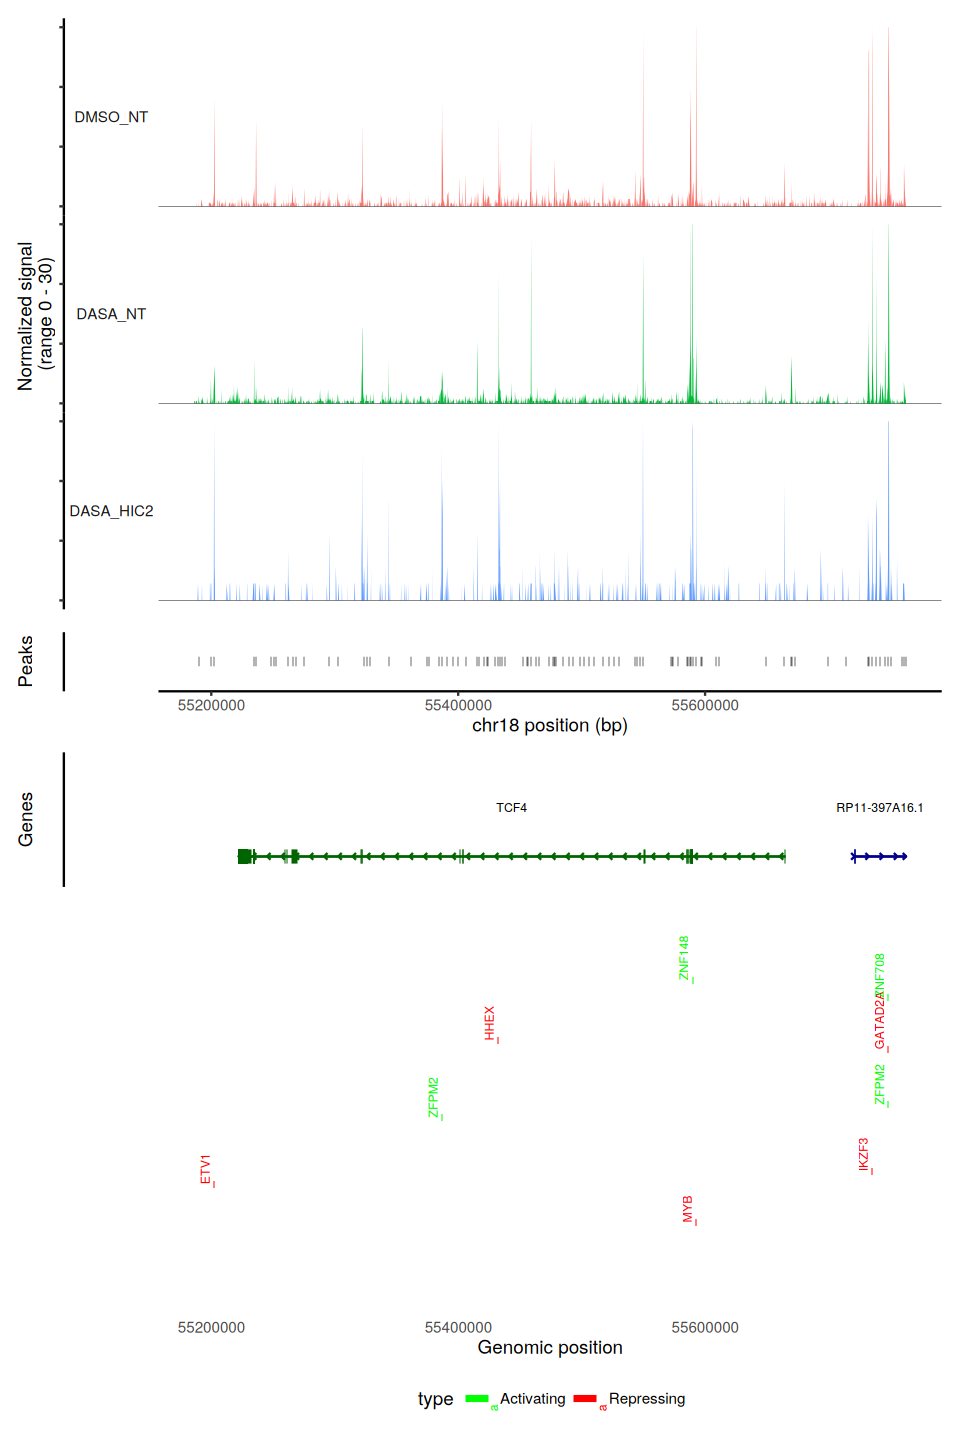

In [65]:
options(repr.plot.width=8, repr.plot.height=12)
regulatory_regions <- data.frame(
  start = as.numeric(sub(".*-(\\d+)-\\d+", "\\1", subset_coefs$region)),
  end = as.numeric(sub(".*-\\d+-(\\d+)", "\\1", subset_coefs$region)),
  type = ifelse(subset_coefs$corr < 0, "Repressing", "Activating"),
  name = subset_coefs$tf
)

# start and end coords of the region of interest (chr18:55186072-55762857)
start_coord <- 55186072
end_coord <- 55762857

plot_regulatory_regions <- function(regulatory_regions, start_coord, end_coord) {
  # Add a y-position column with more levels and jitter
  n_levels <- 5
  regulatory_regions$y_pos <- (seq_len(nrow(regulatory_regions)) %% n_levels) - (n_levels %/% 2)
  regulatory_regions$y_pos <- regulatory_regions$y_pos + runif(nrow(regulatory_regions), -0.2, 0.2)

  ggplot() +
    geom_segment(data = regulatory_regions, 
                 aes(x = start, xend = end, 
                     y = y_pos, yend = y_pos, 
                     color = type), 
                 size = 1.5) +
    geom_text(data = regulatory_regions, 
              aes(x = (start + end)/2, 
                  y = y_pos, 
                  label = name, 
                  color = type), 
              vjust = -0.5, 
              size = 2.5, 
              angle = 90, 
              hjust = 0) +
    scale_color_manual(values = c(Activating = "green", Repressing = "red")) +
    scale_x_continuous(limits = c(start_coord, end_coord)) +
    scale_y_continuous(limits = c(-3, 3)) +
    theme_minimal() +
    theme(axis.title.y = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.grid = element_blank(),
          legend.position = "bottom") +
    labs(x = "Genomic position")
}

# Use the function with all regulatory regions
p_regulatory <- plot_regulatory_regions(regulatory_regions, start_coord, end_coord)

# Update the final combined plot
final_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot, p_regulatory),
  heights = c(5, 1, 3)  # Increased the height of the regulatory plot
)
final_plot

In [51]:
head(regulatory_regions)

,start,end,type,name
,<dbl>,<dbl>,<chr>,<chr>
1,55163264,55164185,Repressing,GATA2
2,55163264,55164185,Repressing,MEF2C
3,55202012,55202922,Repressing,ETV1
4,55235918,55236927,Repressing,ETV1
5,55235918,55236927,Activating,KLF13
6,55261775,55262816,Activating,ZNF117


In [57]:
# Get the ranges
# Replace the first hyphen with a colon
fixed_ranges <- sub("-", ":", row.names(seurat_object[["ATAC"]]))

# Create a GRanges object
ranges <- GRanges(fixed_ranges)

# Set the genome info
seqlevelsStyle(ranges) <- "UCSC"
genome(ranges) <- "hg38"

# Replace the ranges in the assay
seurat_object[["ATAC"]]@ranges <- ranges
#####
#####

seurat_object[["ATAC"]] <- RegionStats(
  object = seurat_object[["ATAC"]],
  genome = BSgenome.Hsapiens.UCSC.hg38
)

In [53]:
seurat_object

An object of class Seurat 
624053 features across 4651 samples within 5 assays 
Active assay: ATAC (279098 features, 0 variable features)
 2 layers present: counts, data
 4 other assays present: SCT, RNA, PRTB, chromVAR
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [30]:
# use this object for replotting, make violin plots on the side# try to make a line plot of the zfpm2 activators/repressors saveRDS(seurat_object, '{PATH_3}')

In [58]:
seurat_object <- LinkPeaks(
  object = seurat_object,
  peak.assay = "ATAC",
  expression.assay = "SCT",
  genes.use = NULL
)

Testing 17899 genes and 189831 peaks

Found gene coordinates for 13233 genes



In [ ]:
saveRDS(seurat_object, '{PATH_4}')# seurat_object <- readRDS('{PATH_5}')

In [24]:
link_plot <- LinkPlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  min.cutoff = 0
)
link_plot

NULL

In [ ]:
# Update the final combined plot to have links
final_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot, p_regulatory, link_plot),
  heights = c(5, 1, 3, 2)  # Increased the height of the regulatory plot
)
final_plot

In [1]:
library(Pando)
library(Seurat)
library(BSgenome.Hsapiens.UCSC.hg38)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:Pando’:

    LayerData, VariableFeatures


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘Seurat’


The following objects are masked from ‘package:Pando’:

    GetAssay, VariableFeatures


Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Po

In [2]:
data(motifs)

In [18]:
motifs$MA0103.3	

An object of class PFMatrix
ID: MA0103.3
Name: ZEB1
Matrix Class: Homeo domain factors
strand: +
Tags: 
$centrality_logp
[1] "-1227.33"

$family
[1] "HD-ZF factors"

$medline
[1] "8065305"

$remap_tf_name
[1] "ZEB1"

$source
[1] "29126285"

$tax_group
[1] "vertebrates"

$tfbs_shape_id
[1] "101"

$type
[1] "ChIP-seq"

$unibind
[1] "1"

$collection
[1] "CORE"

$species
          9606 
"Homo sapiens" 

$acc
[1] "P37275"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
  [,1] [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8] [,9] [,10] [,11]
A 3211 4685   114 19905    32   193     4   441 1982  4258  3490
C 7998 5550 19195     0 19878 19257   501   178 9561  6117  6955
G 5228 5179   158   223    97   649   355 19381 5178  6601  5828
T 3692 4715   662     1   122    30 19269   129 3408  3153  3856

In [9]:
data(motif2tf)

In [16]:
motif2tf[motif2tf$tf == "ZFPM2", ]

motif,tf,origin,gene_id,family,name,symbol,motif_tf
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
MA0508.3,ZFPM2,SEQ_SIMILARITY,ENSG00000169946,More than 3 adjacent zinc finger factors,PRDM1,-,NA
MA0138.2,ZFPM2,SEQ_SIMILARITY,ENSG00000169946,Factors with multiple dispersed zinc fingers,REST,REST,NA
MA0103.3,ZFPM2,SEQ_SIMILARITY,ENSG00000169946,HD-ZF factors,ZEB1,-,NA


In [15]:
table(motif2tf$name == "ZFPM2")


FALSE 
 1636 